In [43]:
# Se importan librerias que se usaran en el proyecto
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



In [11]:
# Cargamos un dataframe con la informacion del archivo provisto
df = pd.read_csv('../data/raw/spotify-2023.csv', encoding='ISO-8859-1') # Se utiliza encoding ISO-8859-1 para evitar errores en la carga

In [29]:
# Mostrar las primeras filas para explorar el contenido
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            952 non-null    object 
 1   artist(s)_name        952 non-null    object 
 2   artist_count          952 non-null    int64  
 3   released_year         952 non-null    int64  
 4   released_month        952 non-null    int64  
 5   released_day          952 non-null    int64  
 6   in_spotify_playlists  952 non-null    int64  
 7   in_spotify_charts     952 non-null    int64  
 8   streams               952 non-null    float64
 9   in_apple_playlists    952 non-null    int64  
 10  in_apple_charts       952 non-null    int64  
 11  in_deezer_playlists   952 non-null    object 
 12  in_deezer_charts      952 non-null    int64  
 13  in_shazam_charts      902 non-null    object 
 14  bpm                   952 non-null    int64  
 15  key                   857 no

In [32]:
print(df.isnull().sum())

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [34]:
# Rellenar los valores nulos en 'in_shazam_charts' con 0.  
df['in_shazam_charts'].fillna(0, inplace=True)

In [35]:
print(df.isnull().sum())

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts         0
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


              bpm  danceability_%   valence_%    energy_%  acousticness_%  \
count  952.000000      952.000000  952.000000  952.000000      952.000000   
mean   122.553571       66.984244   51.406513   64.274160       27.078782   
std     28.069601       14.631282   23.480526   16.558517       26.001599   
min     65.000000       23.000000    4.000000    9.000000        0.000000   
25%     99.750000       57.000000   32.000000   53.000000        6.000000   
50%    121.000000       69.000000   51.000000   66.000000       18.000000   
75%    140.250000       78.000000   70.000000   77.000000       43.000000   
max    206.000000       96.000000   97.000000   97.000000       97.000000   

       instrumentalness_%  liveness_%  speechiness_%  
count          952.000000  952.000000     952.000000  
mean             1.582983   18.214286      10.138655  
std              8.414064   13.718374       9.915399  
min              0.000000    3.000000       2.000000  
25%              0.000000   10.

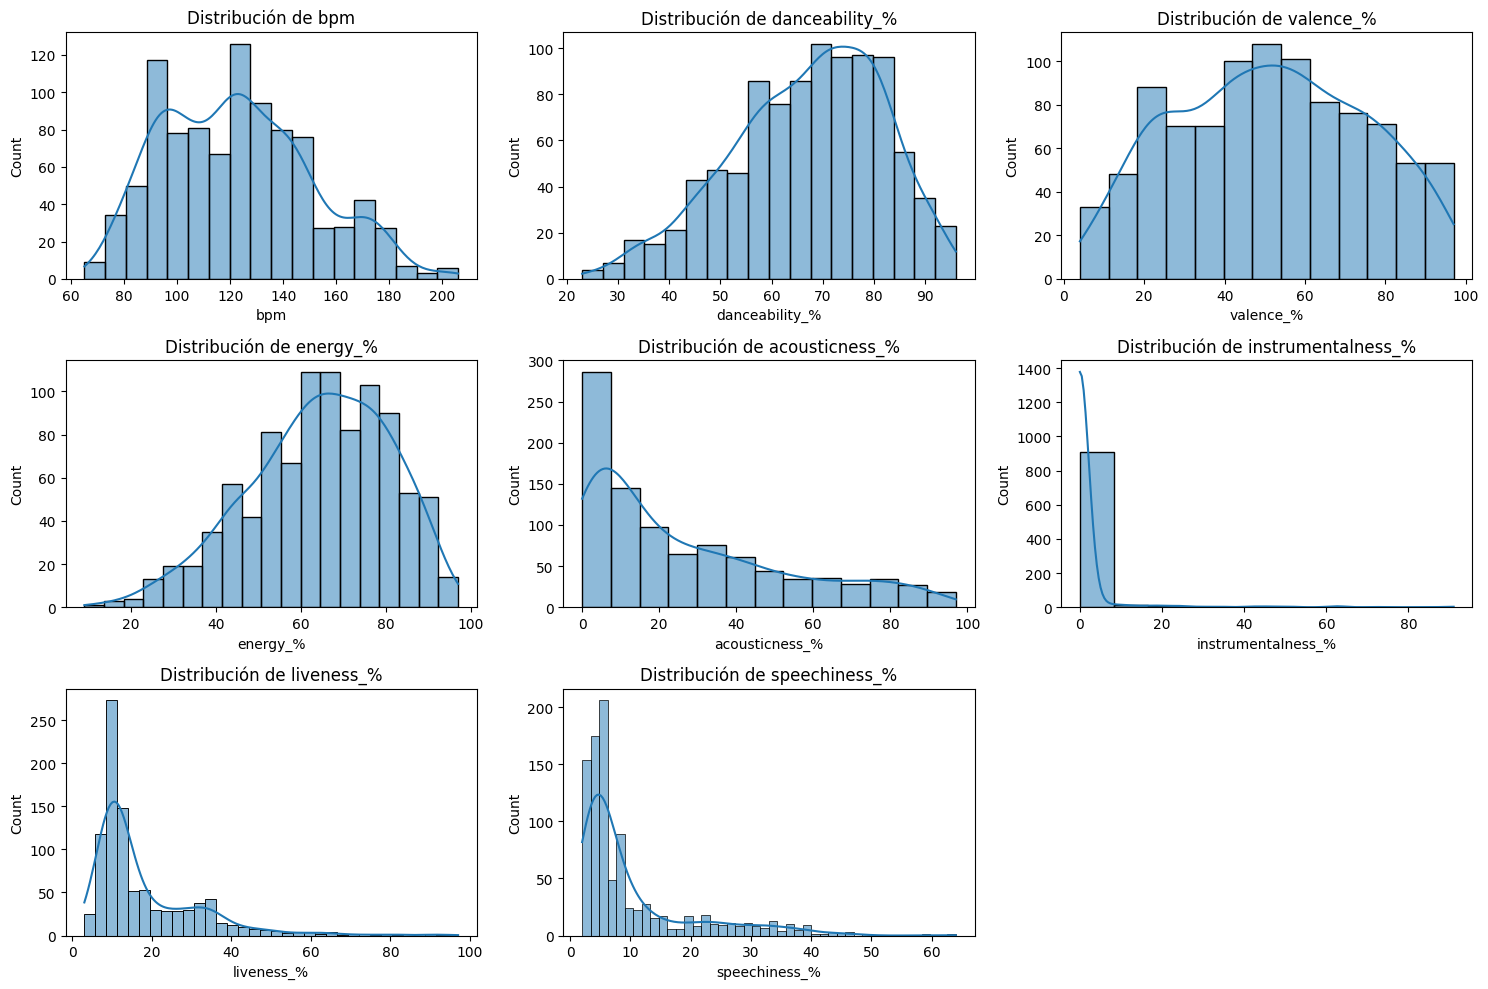

In [36]:
# Estadísticas descriptivas de las características musicales
audio_features = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
print(df[audio_features].describe())

# Graficar la distribución de cada característica
plt.figure(figsize=(15, 10))
for i, feature in enumerate(audio_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribución de {feature}')
plt.tight_layout()
plt.show()

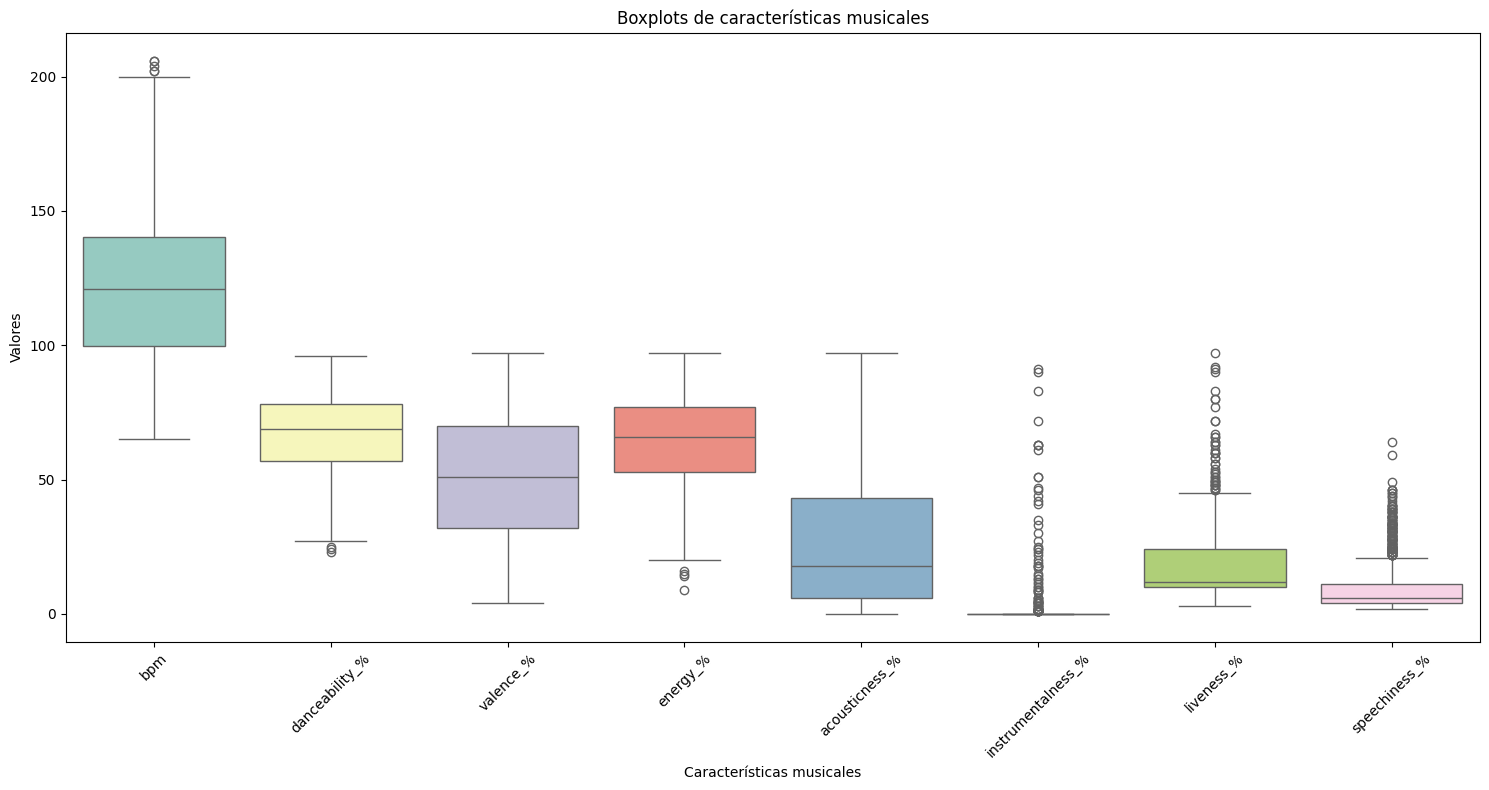

In [40]:
plt.figure(figsize=(15, 8))

# Crear un boxplot para cada característica en una sola gráfica
sns.boxplot(data=df[audio_features], palette='Set3')

plt.title('Boxplots de características musicales')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.xlabel('Características musicales')
plt.ylabel('Valores')
plt.tight_layout()
plt.show()



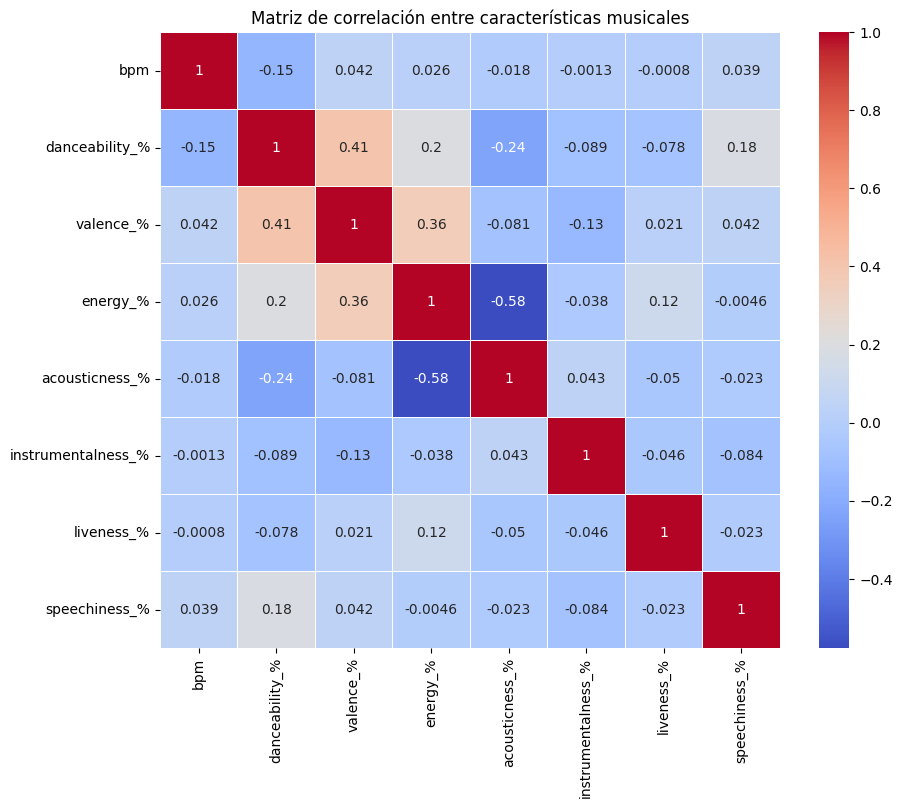

In [37]:
# Matriz de correlación
correlation_matrix = df[audio_features].corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación entre características musicales')
plt.show()

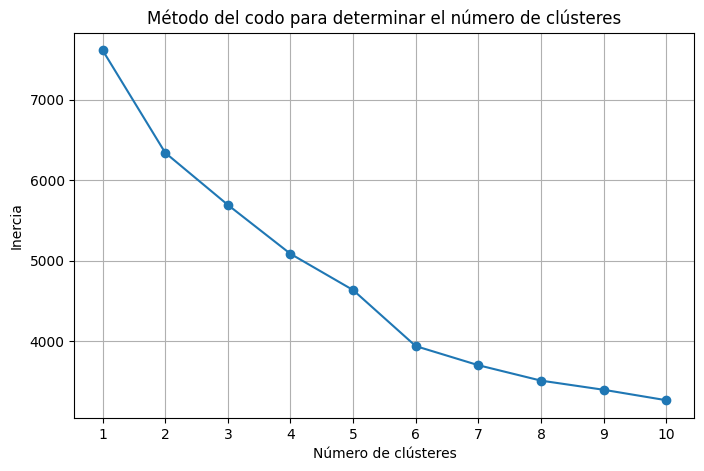

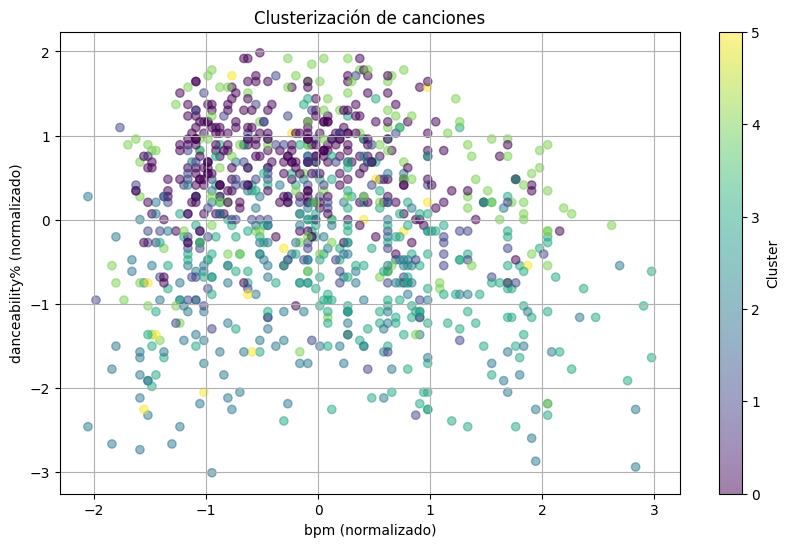

In [45]:
# Paso 1: Preprocesamiento de datos
# Seleccionar las características para la clusterización
X = df[audio_features]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Paso 2: Determinar el número de clústeres usando el método del codo
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Método del codo para determinar el número de clústeres')
plt.xlabel('Número de clústeres')
plt.ylabel('Inercia')
plt.xticks(k_values)
plt.grid()
plt.show()

# Paso 3: Aplicar K-Means con el número óptimo de clústeres (ajusta k según el gráfico)
optimal_k = 6  # Cambia este valor según lo que determines del gráfico del codo
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualización de los clústeres en las primeras dos dimensiones
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.title('Clusterización de canciones')
plt.xlabel('bpm (normalizado)')
plt.ylabel('danceability% (normalizado)')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()


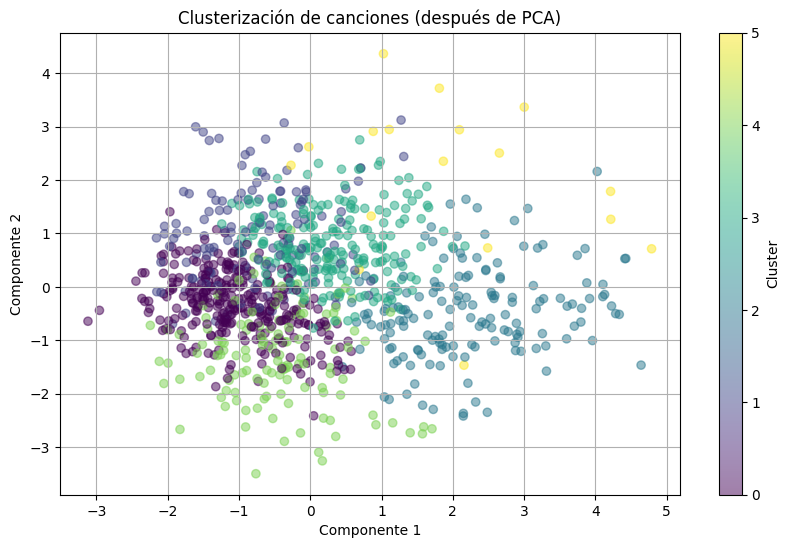

In [46]:

from sklearn.decomposition import PCA

# Paso 1: Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Paso 2: Aplicar K-Means con el número óptimo de clústeres
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Paso 3: Visualización de los clústeres en las dos dimensiones PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.title('Clusterización de canciones (después de PCA)')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()


In [53]:
# Agregar una nueva columna 'Streams_MM' al DataFrame y redondear a 2 decimales
df['Streams_MM'] = (df['streams'] / 1_000_000).round(2)

# Verificar que la nueva columna se haya agregado correctamente
print(df[['streams', 'Streams_MM']].head())  # Mostrar las primeras filas de 'streams' y 'Streams_MM'


       streams  Streams_MM
0  141381703.0      141.38
1  133716286.0      133.72
2  140003974.0      140.00
3  800840817.0      800.84
4  303236322.0      303.24


In [54]:
# Calcular estadísticas descriptivas por clúster
cluster_stats = df.groupby('cluster')[audio_features].mean()
print(cluster_stats)


                bpm  danceability_%  valence_%   energy_%  acousticness_%  \
cluster                                                                     
0        116.335616       77.410959  70.448630  71.438356       19.982877   
1        116.387597       67.627907  55.620155  73.728682       16.224806   
2        118.580247       54.135802  37.092593  42.061728       67.913580   
3        134.040179       58.741071  35.848214  66.888393       13.232143   
4        127.851562       74.117188  51.609375  62.687500       26.234375   
5        122.764706       60.352941  32.235294  58.647059       31.000000   

         instrumentalness_%  liveness_%  speechiness_%  
cluster                                                 
0                  0.321918   12.835616       7.068493  
1                  0.069767   43.503876       8.124031  
2                  1.345679   16.648148       6.500000  
3                  0.892857   13.843750       6.223214  
4                  0.078125   15.171875  

In [55]:
# Calcular estadísticas descriptivas por clúster, incluyendo reproducciones promedio
cluster_stats = df.groupby('cluster')[audio_features + ['Streams_MM']].mean()
print(cluster_stats)


                bpm  danceability_%  valence_%   energy_%  acousticness_%  \
cluster                                                                     
0        116.335616       77.410959  70.448630  71.438356       19.982877   
1        116.387597       67.627907  55.620155  73.728682       16.224806   
2        118.580247       54.135802  37.092593  42.061728       67.913580   
3        134.040179       58.741071  35.848214  66.888393       13.232143   
4        127.851562       74.117188  51.609375  62.687500       26.234375   
5        122.764706       60.352941  32.235294  58.647059       31.000000   

         instrumentalness_%  liveness_%  speechiness_%  Streams_MM  
cluster                                                             
0                  0.321918   12.835616       7.068493  536.395685  
1                  0.069767   43.503876       8.124031  462.749767  
2                  1.345679   16.648148       6.500000  564.877099  
3                  0.892857   13.84375

In [50]:
# Recuento de canciones por artista
artist_counts = df['artist(s)_name'].value_counts().reset_index()
artist_counts.columns = ['artist', 'song_count']
print(artist_counts.head(10))  # Mostrar los 10 artistas con más canciones


             artist  song_count
0      Taylor Swift          34
1        The Weeknd          22
2         Bad Bunny          19
3               SZA          19
4      Harry Styles          17
5    Kendrick Lamar          12
6     Morgan Wallen          11
7        Ed Sheeran           9
8              Feid           8
9  Drake, 21 Savage           8


In [56]:
# Promedio de reproducciones por artista
artist_streams = df.groupby('artist(s)_name')['Streams_MM'].mean().reset_index()
artist_streams.columns = ['artist', 'average_streams']
artist_streams = artist_streams.sort_values(by='average_streams', ascending=False)
print(artist_streams.head(10))  # Mostrar los 10 artistas con más reproducciones promedio


                           artist  average_streams
592                   Tones and I          2864.79
464         Post Malone, Swae Lee          2808.10
150           Drake, WizKid, Kyla          2713.92
272  Justin Bieber, The Kid Laroi          2665.34
562      The Chainsmokers, Halsey          2591.22
573         The Weeknd, Daft Punk          2565.53
207                 Glass Animals          2557.98
524  Shawn Mendes, Camila Cabello          2484.81
61          Billie Eilish, Khalid          2355.72
561    The Chainsmokers, Coldplay          2204.08


In [57]:
# Promedio de cada característica por artista y clúster
artist_cluster_stats = df.groupby(['artist(s)_name', 'cluster'])[audio_features + ['streams']].mean().reset_index()
print(artist_cluster_stats.head(10))  # Mostrar las primeras 10 filas del análisis por artista y clúster


                                      artist(s)_name  cluster    bpm  \
0                                           (G)I-DLE        0  130.0   
1                                           (G)I-DLE        1  136.0   
2                                   21 Savage, Gunna        3  148.0   
3                                24kgoldn, Iann Dior        0   91.0   
4                                            50 Cent        4   90.0   
5                   A$AP Rocky, Metro Boomin, Roisee        3   90.0   
6                          Abhijay Sharma, Riar Saab        0  135.0   
7  Adassa, Mauro Castillo, Stephanie Beatriz, Enc...        3  206.0   
8                                              Adele        0  105.0   
9                                              Adele        2  142.0   

   danceability_%  valence_%  energy_%  acousticness_%  instrumentalness_%  \
0            82.0       69.0      83.0             3.0                 0.0   
1            73.0       65.0      91.0             

In [59]:
# Promedio de reproducciones en millones por artista
artist_streams = df.groupby('artist(s)_name')['Streams_MM'].mean().reset_index()
artist_streams.columns = ['artist', 'average_streams_MM']
artist_streams = artist_streams.sort_values(by='average_streams_MM', ascending=False)
print(artist_streams.head(10))  # Mostrar los 10 artistas con más reproducciones promedio



                           artist  average_streams_MM
592                   Tones and I             2864.79
464         Post Malone, Swae Lee             2808.10
150           Drake, WizKid, Kyla             2713.92
272  Justin Bieber, The Kid Laroi             2665.34
562      The Chainsmokers, Halsey             2591.22
573         The Weeknd, Daft Punk             2565.53
207                 Glass Animals             2557.98
524  Shawn Mendes, Camila Cabello             2484.81
61          Billie Eilish, Khalid             2355.72
561    The Chainsmokers, Coldplay             2204.08


C:\Users\sergi\AppData\Local\Temp\ipykernel_18468\1284353511.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='song_count', y='artist', data=artist_counts.head(10), palette='viridis')


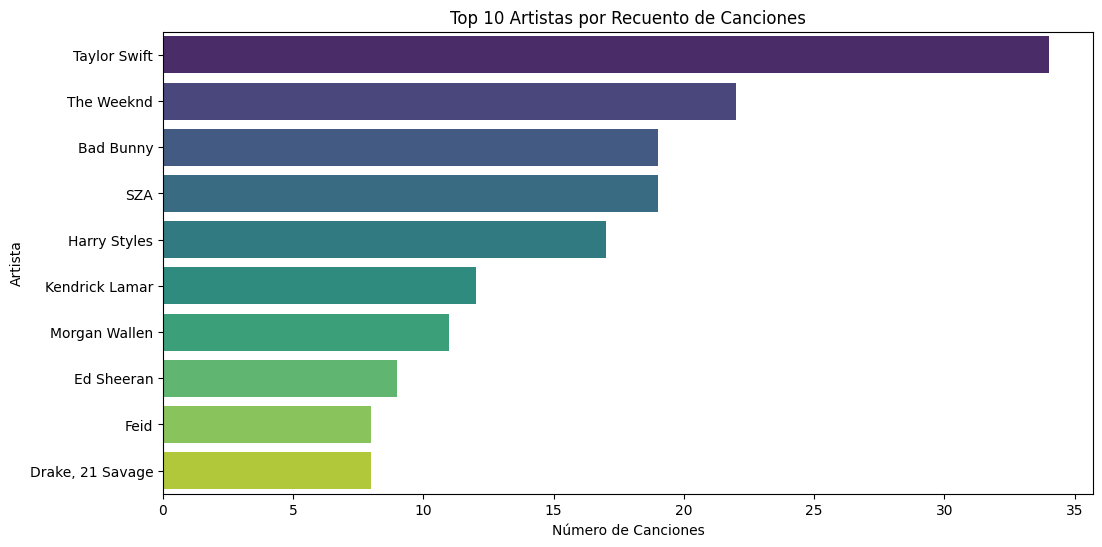

In [60]:
# Gráfico de barras del recuento de canciones por artista
plt.figure(figsize=(12, 6))
sns.barplot(x='song_count', y='artist', data=artist_counts.head(10), palette='viridis')
plt.title('Top 10 Artistas por Recuento de Canciones')
plt.xlabel('Número de Canciones')
plt.ylabel('Artista')
plt.show()

C:\Users\sergi\AppData\Local\Temp\ipykernel_18468\3189738573.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_streams_MM', y='artist', data=artist_streams.head(10), palette='magma')


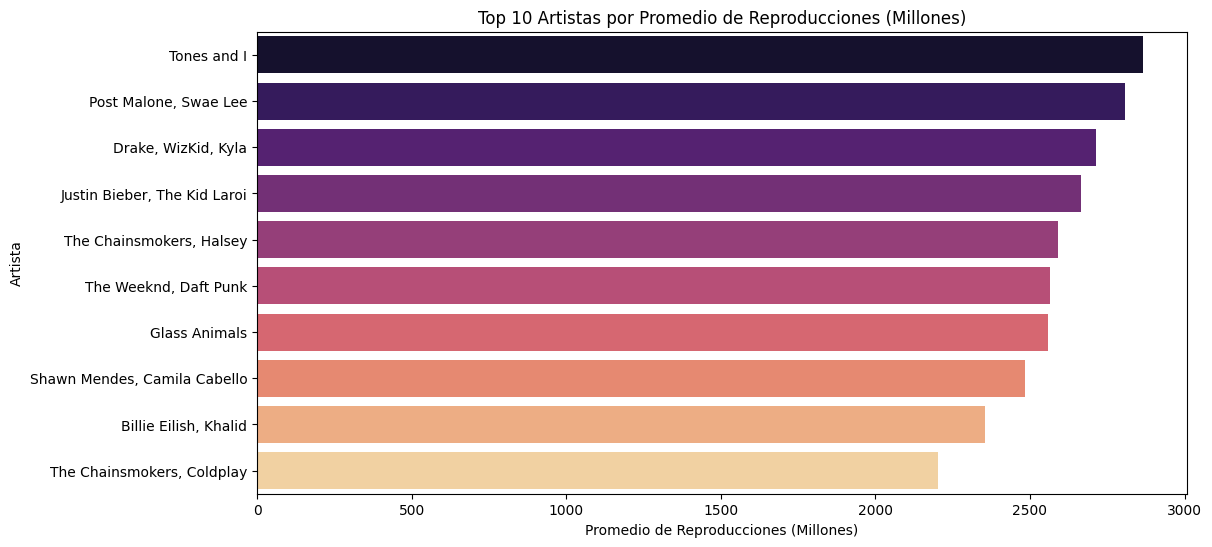

In [61]:
# Gráfico de barras del promedio de reproducciones en millones por artista
plt.figure(figsize=(12, 6))
sns.barplot(x='average_streams_MM', y='artist', data=artist_streams.head(10), palette='magma')
plt.title('Top 10 Artistas por Promedio de Reproducciones (Millones)')
plt.xlabel('Promedio de Reproducciones (Millones)')
plt.ylabel('Artista')
plt.show()


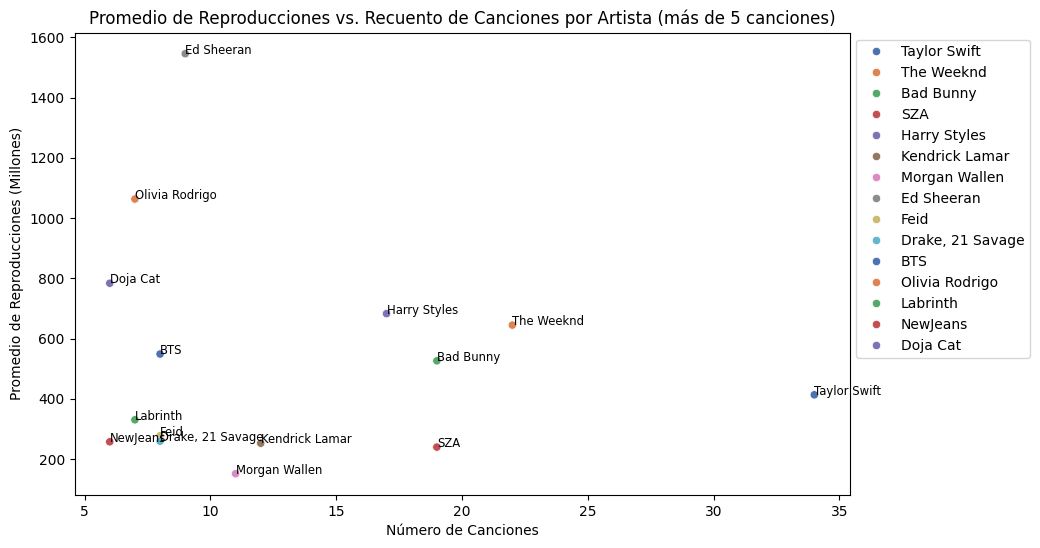

In [69]:
# Filtrar los datos para incluir solo artistas con más de 5 canciones
filtered_artist_data = combined_artist_data[combined_artist_data['song_count'] > 5]

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='song_count', y='average_streams_MM', data=filtered_artist_data, hue='artist', palette='deep')

# Etiquetar cada punto con el nombre del artista
for line in range(0, filtered_artist_data.shape[0]):
    plt.text(filtered_artist_data.song_count.iloc[line],
             filtered_artist_data.average_streams_MM.iloc[line],
             filtered_artist_data.artist.iloc[line], 
             horizontalalignment='left',
             size='small', 
             color='black', 
             weight='light')

plt.title('Promedio de Reproducciones vs. Recuento de Canciones por Artista (más de 5 canciones)')
plt.xlabel('Número de Canciones')
plt.ylabel('Promedio de Reproducciones (Millones)')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()



C:\Users\sergi\AppData\Local\Temp\ipykernel_18468\2628101578.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_streams', y='artist', data=top_artists_total_streams, palette='coolwarm')


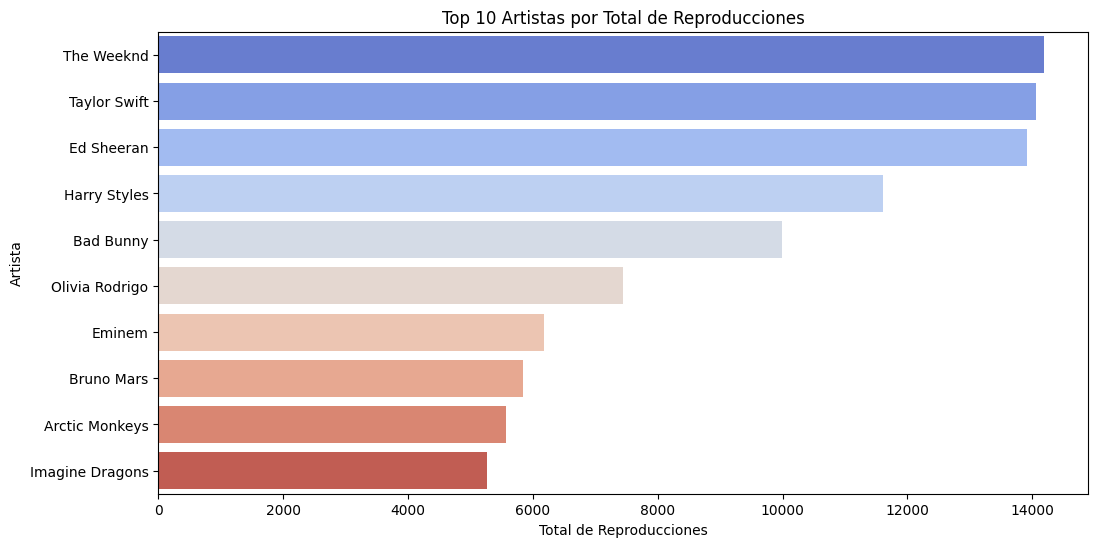

In [73]:
# Calcular el total de streams por artista
artist_total_streams = df.groupby('artist(s)_name')['Streams_MM'].sum().reset_index()
artist_total_streams.columns = ['artist', 'total_streams']

# Ordenar por total de streams en orden descendente y seleccionar los 10 principales
top_artists_total_streams = artist_total_streams.sort_values(by='total_streams', ascending=False).head(10)

# Gráfico de barras de los 10 artistas con más total streams
plt.figure(figsize=(12, 6))
sns.barplot(x='total_streams', y='artist', data=top_artists_total_streams, palette='coolwarm')
plt.title('Top 10 Artistas por Total de Reproducciones')
plt.xlabel('Total de Reproducciones')
plt.ylabel('Artista')
plt.show()


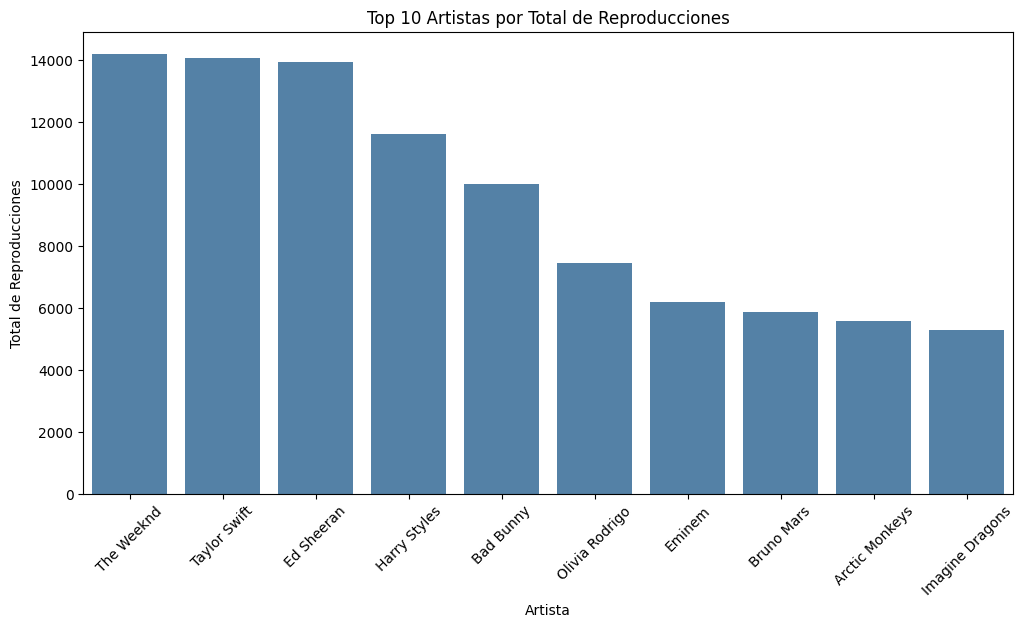

In [74]:
# Gráfico de barras verticales de los 10 artistas con más total streams
plt.figure(figsize=(12, 6))
sns.barplot(x='artist', y='total_streams', data=top_artists_total_streams, color='steelblue')
plt.title('Top 10 Artistas por Total de Reproducciones')
plt.xlabel('Artista')
plt.ylabel('Total de Reproducciones')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()


In [81]:
# Calcular los streams totales acumulados por artista
total_streams_per_artist = df.groupby('artist(s)_name')['Streams_MM'].sum().reset_index()

# Obtener el top 10 artistas con más streams acumulados
top_artists = total_streams_per_artist.nlargest(10, 'Streams_MM')['artist(s)_name'].tolist()




In [83]:
# Calcular el total de reproducciones por año para cada artista utilizando Streams_MM
artist_yearly_streams = df.groupby(['released_year', 'artist(s)_name'])['Streams_MM'].sum().reset_index()

# Filtrar para incluir solo los 10 artistas principales
top_artist_yearly_streams = artist_yearly_streams[artist_yearly_streams['artist(s)_name'].isin(top_artists)]



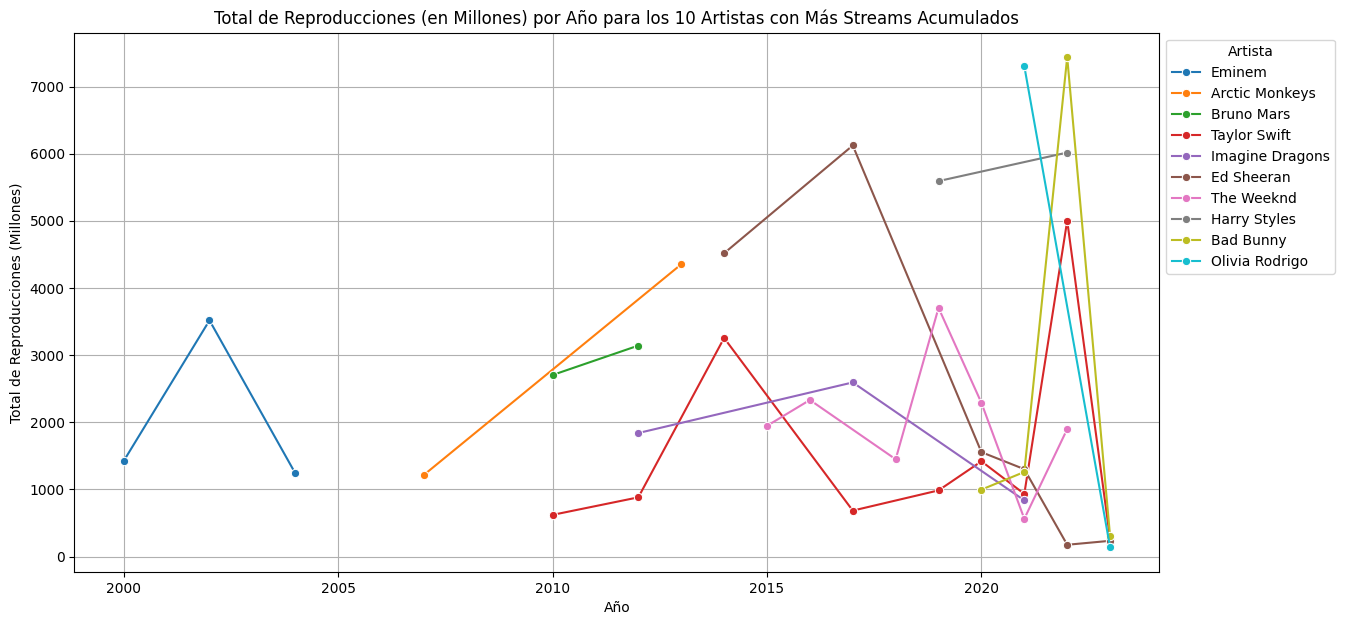

In [84]:
# Gráfico de líneas de total de reproducciones por año para los 10 artistas principales
plt.figure(figsize=(14, 7))
sns.lineplot(data=top_artist_yearly_streams, x='released_year', y='Streams_MM', hue='artist(s)_name', marker='o')
plt.title('Total de Reproducciones (en Millones) por Año para los 10 Artistas con Más Streams Acumulados')
plt.xlabel('Año')
plt.ylabel('Total de Reproducciones (Millones)')
plt.legend(title='Artista', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid()
plt.show()


In [87]:
# Calcular el promedio de cada característica cuantitativa por año
features = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 
            'instrumentalness_%', 'liveness_%', 'speechiness_%']

average_features_per_year = df.groupby('released_year')[features].mean().reset_index()



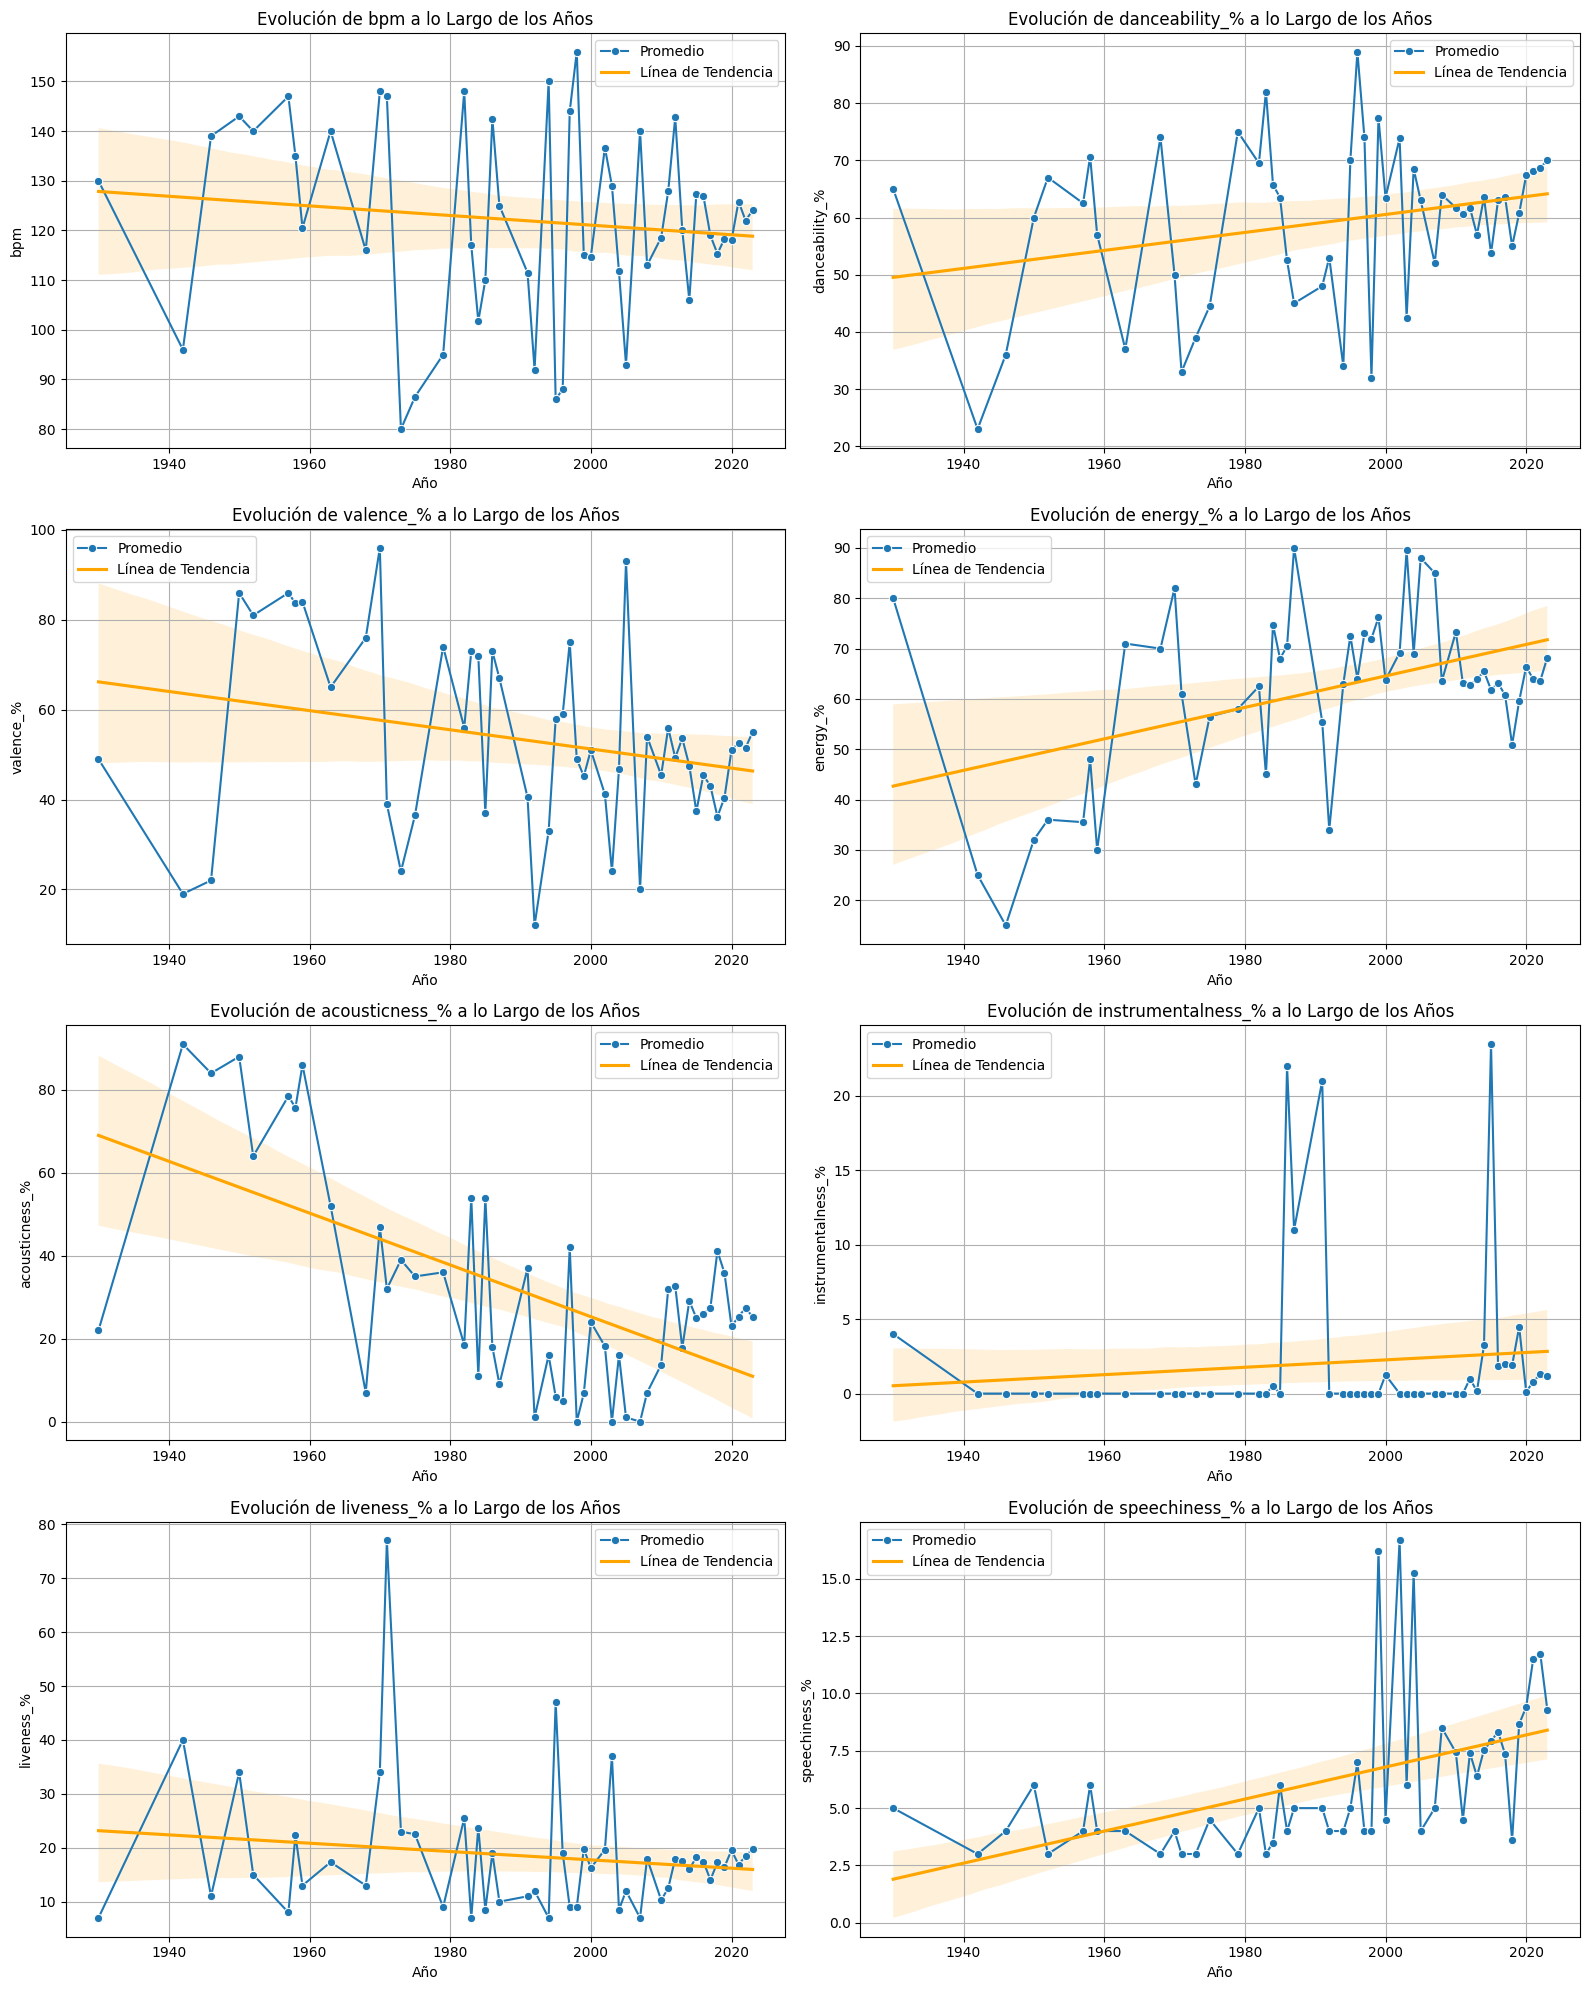

In [88]:
# Configuración de subgráficos para visualizar la evolución de cada característica
plt.figure(figsize=(16, 20))

for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i)
    sns.lineplot(data=average_features_per_year, x='released_year', y=feature, marker='o', label='Promedio')
    
    # Agregar línea de tendencia
    sns.regplot(data=average_features_per_year, x='released_year', y=feature, scatter=False, color='orange', label='Línea de Tendencia')
    
    plt.title(f'Evolución de {feature} a lo Largo de los Años')
    plt.xlabel('Año')
    plt.ylabel(feature)
    plt.grid()
    plt.legend()

plt.tight_layout()
plt.show()


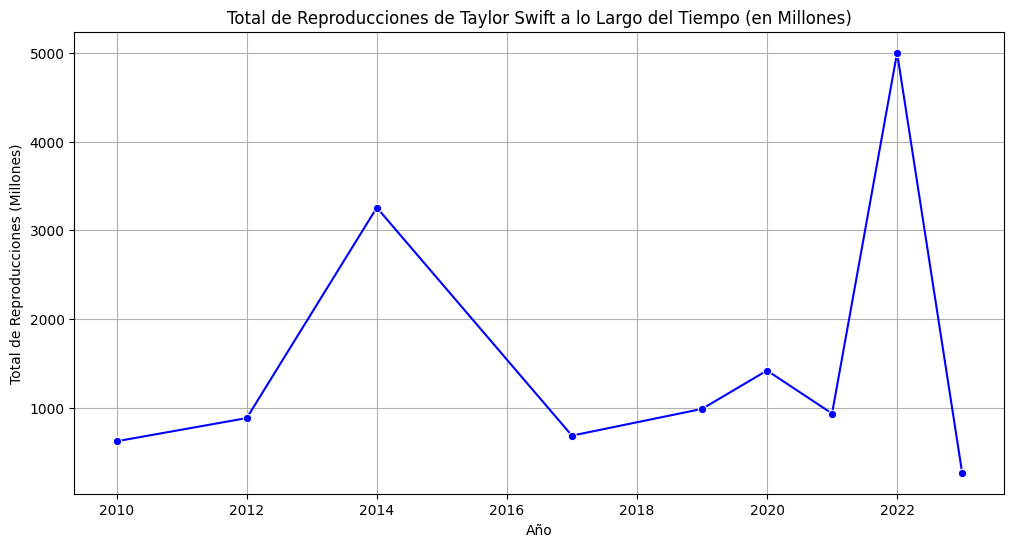

In [99]:
# Filtrar los datos para Taylor Swift
taylor_data = df[df['artist(s)_name'] == 'Taylor Swift']

# Calcular las reproducciones totales por año utilizando Streams_MM
taylor_streams_per_year = taylor_data.groupby('released_year')['Streams_MM'].sum().reset_index()

# Gráfico de líneas para total de reproducciones a lo largo del tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(data=taylor_streams_per_year, x='released_year', y='Streams_MM', marker='o', color='blue')
plt.title('Total de Reproducciones de Taylor Swift a lo Largo del Tiempo (en Millones)')
plt.xlabel('Año')
plt.ylabel('Total de Reproducciones (Millones)')
plt.grid()
plt.show()



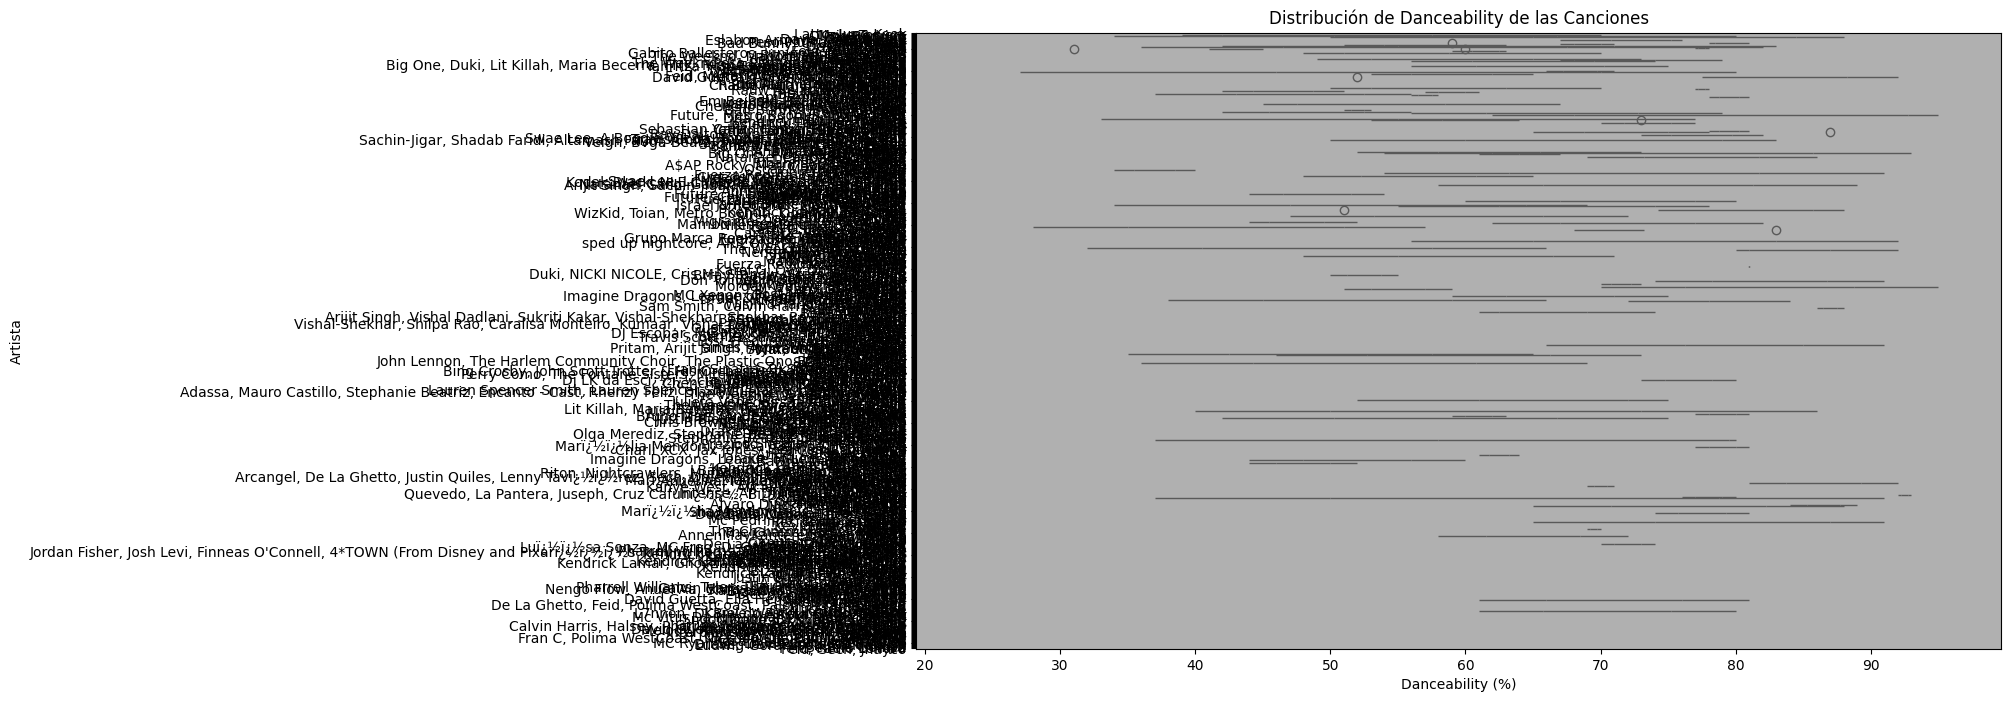

In [100]:
# Gráfico de caja para características de canciones (ejemplo: danceability)
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='danceability_%', y='artist(s)_name', palette='Set2', hue='artist(s)_name', dodge=True)
plt.title('Distribución de Danceability de las Canciones')
plt.xlabel('Danceability (%)')
plt.ylabel('Artista')
plt.grid()
plt.show()



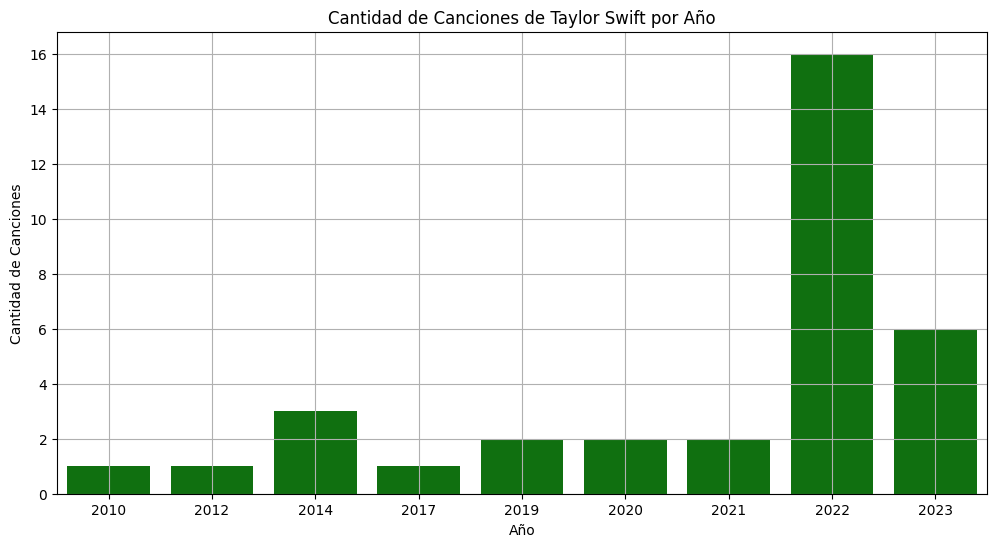

In [101]:
# Contar la cantidad de canciones de Taylor Swift por año
taylor_songs_per_year = taylor_data.groupby('released_year')['track_name'].count().reset_index()

# Gráfico de barras para la cantidad de canciones por año
plt.figure(figsize=(12, 6))
sns.barplot(data=taylor_songs_per_year, x='released_year', y='track_name', color='green')
plt.title('Cantidad de Canciones de Taylor Swift por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Canciones')
plt.grid()
plt.show()


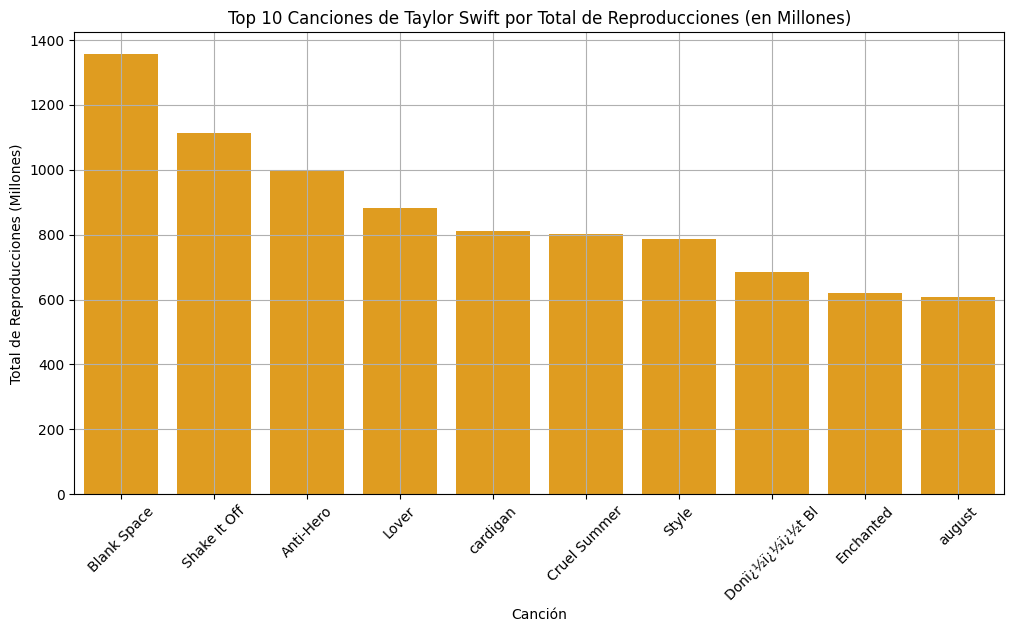

In [103]:
# Calcular el total de reproducciones para cada canción y obtener el top 10 utilizando Streams_MM
top_10_songs = taylor_data.groupby('track_name')['Streams_MM'].sum().nlargest(10).reset_index()

# Gráfico de barras para el top 10 canciones
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_songs, x='track_name', y='Streams_MM', color='orange')
plt.title('Top 10 Canciones de Taylor Swift por Total de Reproducciones (en Millones)')
plt.xlabel('Canción')
plt.ylabel('Total de Reproducciones (Millones)')
plt.xticks(rotation=45)
plt.grid()
plt.show()




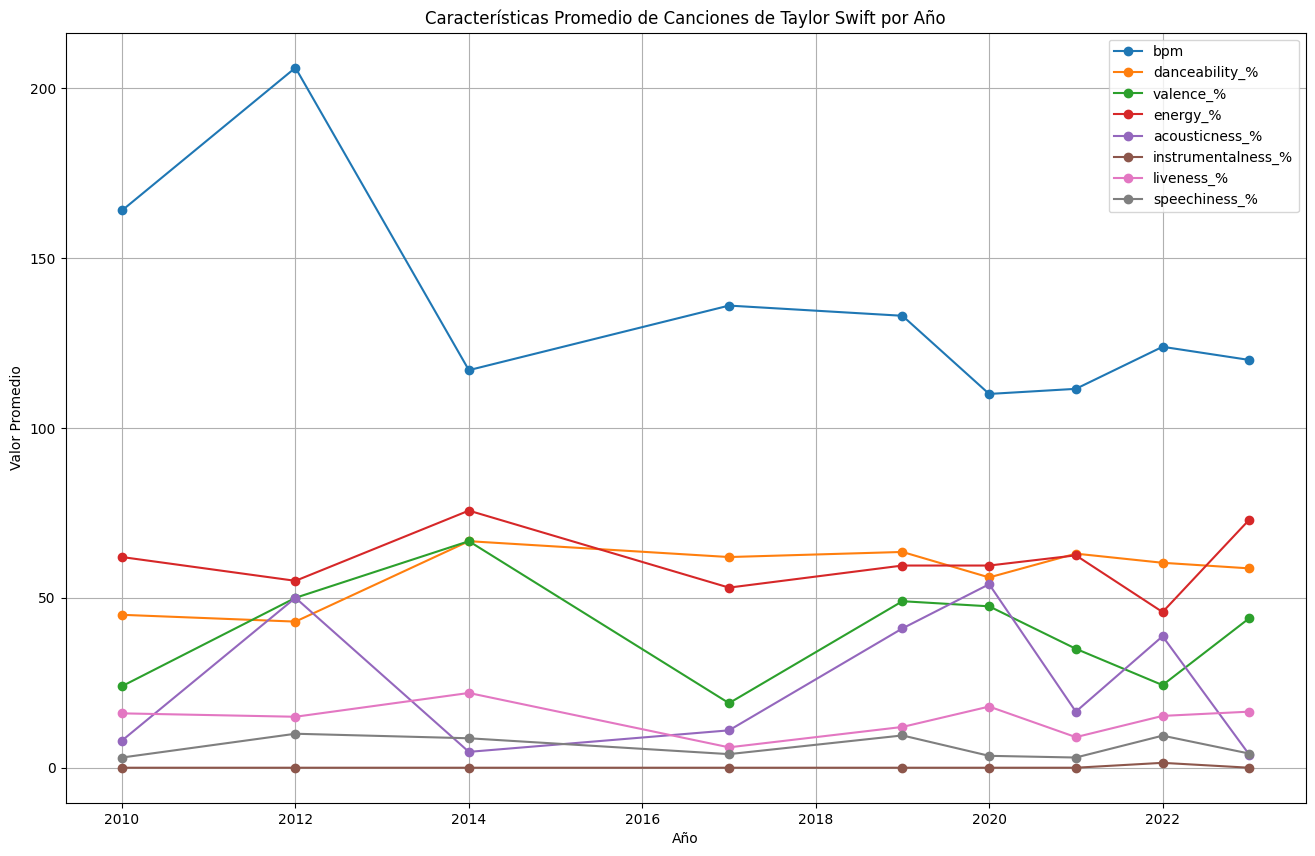

In [104]:
# Calcular las características promedio por año
average_features_per_year = taylor_data.groupby('released_year')[features].mean().reset_index()

# Graficar características promedio por año
plt.figure(figsize=(16, 10))
for feature in features:
    plt.plot(average_features_per_year['released_year'], average_features_per_year[feature], marker='o', label=feature)

plt.title('Características Promedio de Canciones de Taylor Swift por Año')
plt.xlabel('Año')
plt.ylabel('Valor Promedio')
plt.legend()
plt.grid()
plt.show()


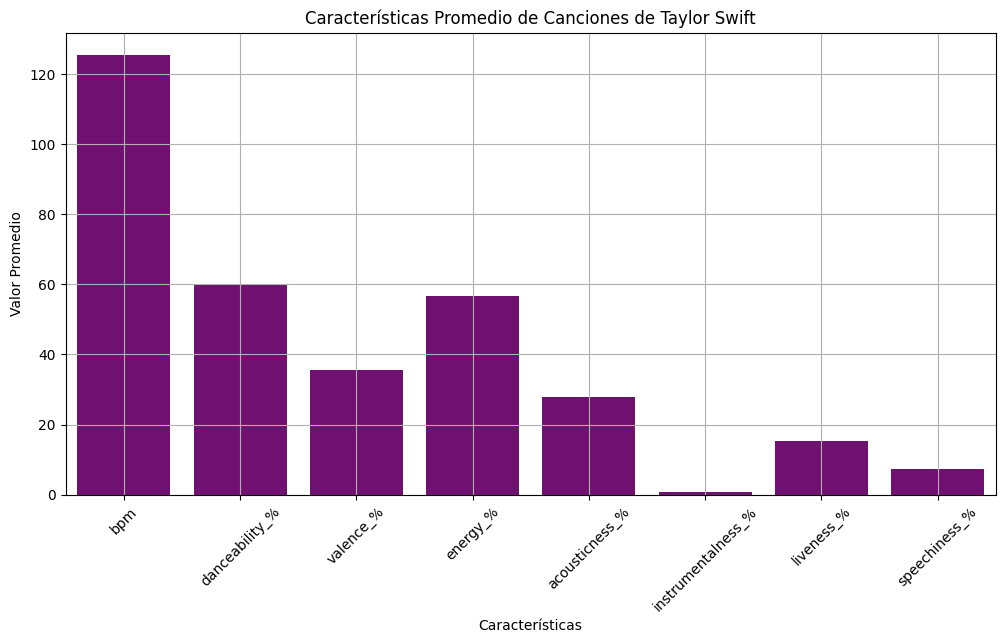

In [106]:
# Calcular características promedio de las canciones de Taylor Swift
average_features = taylor_data[features].mean().reset_index()
average_features.columns = ['Feature', 'Average_Value']

# Gráfico de barras para características promedio
plt.figure(figsize=(12, 6))
sns.barplot(data=average_features, x='Feature', y='Average_Value', color='purple')
plt.title('Características Promedio de Canciones de Taylor Swift')
plt.xlabel('Características')
plt.ylabel('Valor Promedio')
plt.xticks(rotation=45)
plt.grid()
plt.show()


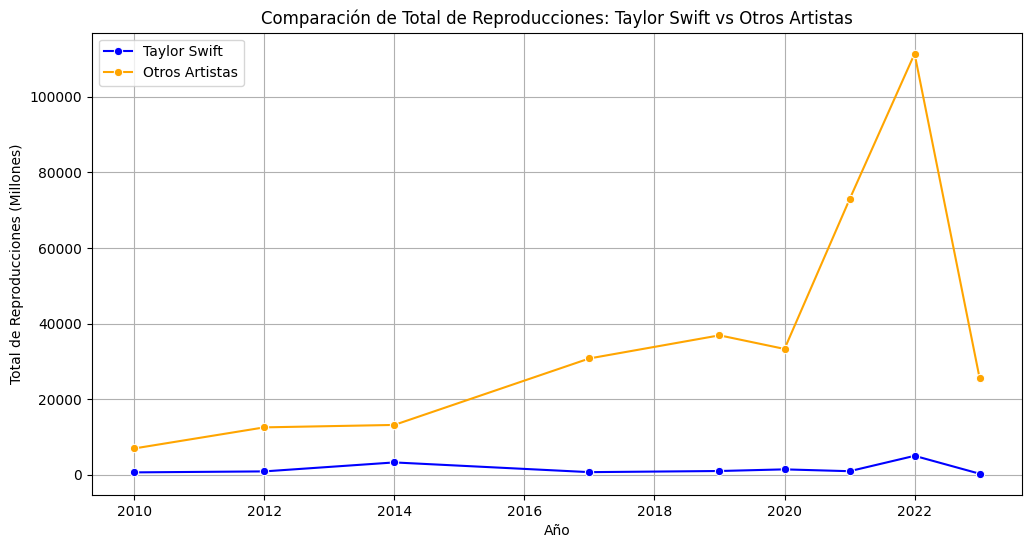

In [107]:
# Calcular total de reproducciones de otros artistas
other_artists_streams = df[df['artist(s)_name'] != 'Taylor Swift'].groupby('released_year')['Streams_MM'].sum().reset_index()
taylor_streams = taylor_data.groupby('released_year')['Streams_MM'].sum().reset_index()

# Unir los datos de Taylor Swift y otros artistas
comparison_streams = pd.merge(taylor_streams, other_artists_streams, on='released_year', suffixes=('_taylor', '_other'))

# Gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(data=comparison_streams, x='released_year', y='Streams_MM_taylor', marker='o', label='Taylor Swift', color='blue')
sns.lineplot(data=comparison_streams, x='released_year', y='Streams_MM_other', marker='o', label='Otros Artistas', color='orange')
plt.title('Comparación de Total de Reproducciones: Taylor Swift vs Otros Artistas')
plt.xlabel('Año')
plt.ylabel('Total de Reproducciones (Millones)')
plt.legend()
plt.grid()
plt.show()


<Figure size 1200x600 with 0 Axes>

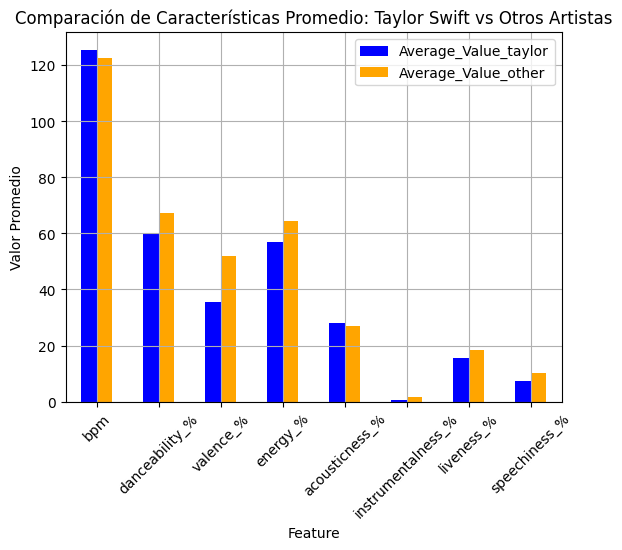

In [108]:
# Calcular características promedio para otros artistas
other_artists_avg_features = df[df['artist(s)_name'] != 'Taylor Swift'][features].mean().reset_index()
other_artists_avg_features.columns = ['Feature', 'Average_Value']

# Calcular características promedio de Taylor Swift
taylor_avg_features = taylor_data[features].mean().reset_index()
taylor_avg_features.columns = ['Feature', 'Average_Value']

# Unir ambos DataFrames
comparison_avg_features = pd.merge(taylor_avg_features, other_artists_avg_features, on='Feature', suffixes=('_taylor', '_other'))

# Gráfico de barras
plt.figure(figsize=(12, 6))
comparison_avg_features.set_index('Feature')[['Average_Value_taylor', 'Average_Value_other']].plot(kind='bar', color=['blue', 'orange'])
plt.title('Comparación de Características Promedio: Taylor Swift vs Otros Artistas')
plt.ylabel('Valor Promedio')
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [112]:
# Selecciona solo las columnas numéricas
numeric_df = df.select_dtypes(include=[np.number])
# Calcular correlaciones y obtener la correlación con Streams_MM
correlation_with_streams = numeric_df.corr()['Streams_MM'].sort_values(ascending=False)
print(correlation_with_streams)


Streams_MM              1.000000
streams                 1.000000
in_spotify_playlists    0.789822
in_apple_playlists      0.772063
in_apple_charts         0.320234
in_spotify_charts       0.245821
in_deezer_charts        0.228598
released_day            0.010598
bpm                    -0.002438
acousticness_%         -0.004485
released_month         -0.024938
energy_%               -0.026052
valence_%              -0.040832
instrumentalness_%     -0.044902
cluster                -0.045721
liveness_%             -0.048337
danceability_%         -0.105457
speechiness_%          -0.112333
artist_count           -0.136463
released_year          -0.230803
Name: Streams_MM, dtype: float64


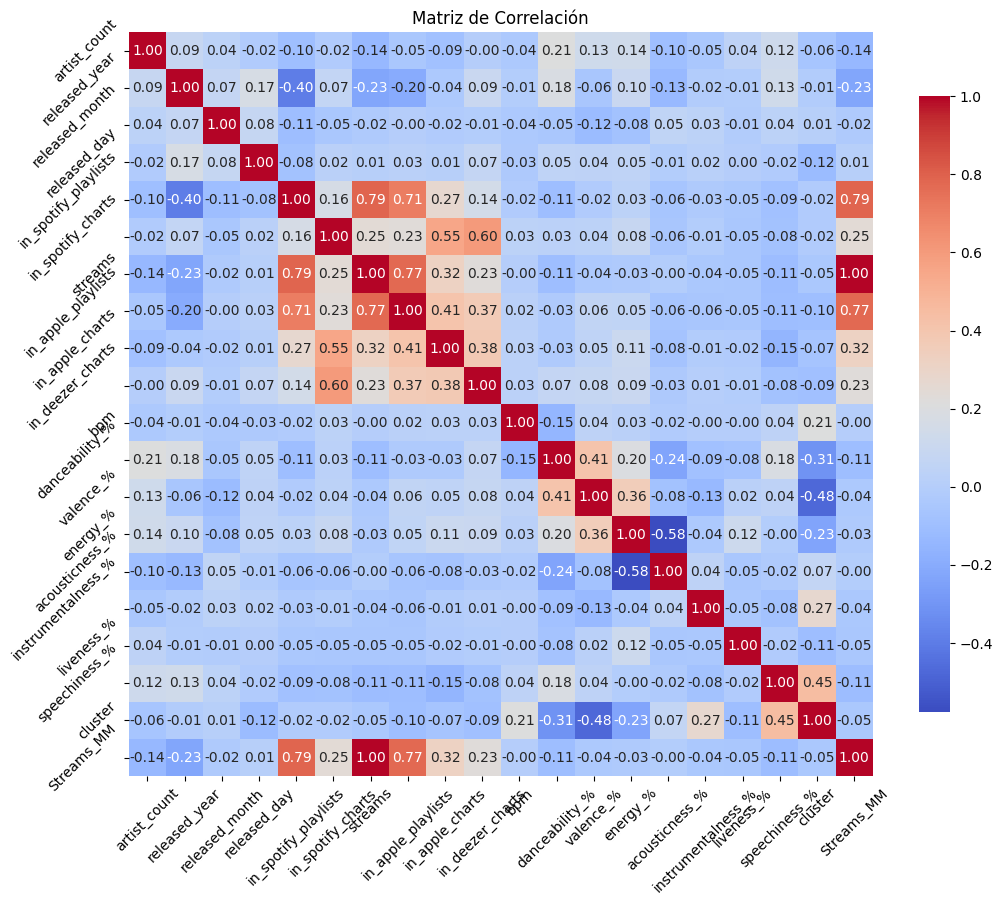

In [114]:
# Selecciona solo las columnas numéricas
numeric_df = df.select_dtypes(include=[np.number])

# Calcula la matriz de correlación
correlation_matrix = numeric_df.corr()

# Configura el tamaño de la figura
plt.figure(figsize=(12, 10))

# Crea un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Configura los títulos y etiquetas
plt.title('Matriz de Correlación')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


